<a href="https://colab.research.google.com/github/amkhaliq/motor-vehicle-collisions/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mohammed Abdul Khaliq

In [ ]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load in the data
pd.set_option('display.max_columns', None)

missing_values = ["n/a", "na", "--", "-", "NA", "NaN"]
crashes = pd.read_csv("/content/drive/MyDrive/dataset/crashes.csv", low_memory=False, na_values = missing_values)
crashes.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,06/25/2018,7:10,NaN,NaN,40.581917,-73.82978,"(40.581917, -73.82978)",BEACH 108 STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3928593,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,07/13/2018,16:09,NaN,NaN,40.678276,-73.89744,"(40.678276, -73.89744)",JACKIE ROBINSON PKWY,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Fell Asleep,Unspecified,Unspecified,Unspecified,NaN,3942476,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN
2,07/03/2018,21:50,BRONX,10461,40.855026,-73.84140,"(40.855026, -73.8414)",STILLWELL AVENUE,MCDONALD STREET,NaN,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,3934983,Taxi,Pick-up Truck,NaN,NaN,NaN
3,07/16/2018,8:00,QUEENS,11367,40.719868,-73.82324,"(40.719868, -73.82324)",78 AVENUE,138 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3942578,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN
4,06/25/2018,17:00,NaN,NaN,40.743275,-73.77572,"(40.743275, -73.77572)",LONG ISLAND EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,3929800,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [ ]:
crashes.tail()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
1762126,07/23/2012,8:41,NaN,NaN,NaN,NaN,NaN,ZEREGA AVENUE,BRUCKNER BOULEVARD,NaN,0.0,0.0,0,0,0,0,0,0,Prescription Medication,Unspecified,NaN,NaN,NaN,80984,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
1762127,07/25/2012,0:45,BRONX,10468,40.861732,-73.911814,"(40.8617318, -73.9118139)",CEDAR AVENUE,WEST FORDHAM ROAD,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,109622,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN
1762128,07/25/2012,19:37,MANHATTAN,10016,40.745727,-73.978123,"(40.7457274, -73.9781227)",EAST 34 STREET,3 AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,32277,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
1762129,07/24/2012,16:35,QUEENS,11385,40.694110,-73.897362,"(40.6941097, -73.8973622)",CYPRESS AVENUE,COOPER AVENUE,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,213422,PASSENGER VEHICLE,VAN,NaN,NaN,NaN
1762130,07/26/2012,9:00,BROOKLYN,11220,40.647621,-74.022040,"(40.6476212, -74.0220397)",1 AVENUE,55 STREET,NaN,1.0,0.0,0,0,0,0,1,0,Unspecified,Unspecified,NaN,NaN,NaN,155982,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN


In [ ]:
# number of instances in the original dataset
crashes.shape

(1762131, 29)

In [ ]:
# data types
crashes.dtypes

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [ ]:
crashes['CRASH_DATE_TIME'] = crashes['CRASH DATE'] + ' ' + crashes['CRASH TIME']

cols_to_drop = ['CRASH DATE', 'CRASH TIME']
crashes.drop(cols_to_drop, axis = 1, inplace = True)

In [ ]:
crashes.head()

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH_DATE_TIME
0,NaN,NaN,40.581917,-73.82978,"(40.581917, -73.82978)",BEACH 108 STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3928593,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,06/25/2018 7:10
1,NaN,NaN,40.678276,-73.89744,"(40.678276, -73.89744)",JACKIE ROBINSON PKWY,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Fell Asleep,Unspecified,Unspecified,Unspecified,NaN,3942476,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,07/13/2018 16:09
2,BRONX,10461,40.855026,-73.84140,"(40.855026, -73.8414)",STILLWELL AVENUE,MCDONALD STREET,NaN,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,3934983,Taxi,Pick-up Truck,NaN,NaN,NaN,07/03/2018 21:50
3,QUEENS,11367,40.719868,-73.82324,"(40.719868, -73.82324)",78 AVENUE,138 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3942578,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,07/16/2018 8:00
4,NaN,NaN,40.743275,-73.77572,"(40.743275, -73.77572)",LONG ISLAND EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,3929800,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,06/25/2018 17:00


In [ ]:
# converting to datetime object

crashes["CRASH_DATE_TIME"] = pd.to_datetime(crashes["CRASH_DATE_TIME"])
crashes.head()

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH_DATE_TIME
0,NaN,NaN,40.581917,-73.82978,"(40.581917, -73.82978)",BEACH 108 STREET,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3928593,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-25 07:10:00
1,NaN,NaN,40.678276,-73.89744,"(40.678276, -73.89744)",JACKIE ROBINSON PKWY,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Fell Asleep,Unspecified,Unspecified,Unspecified,NaN,3942476,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,2018-07-13 16:09:00
2,BRONX,10461,40.855026,-73.84140,"(40.855026, -73.8414)",STILLWELL AVENUE,MCDONALD STREET,NaN,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,3934983,Taxi,Pick-up Truck,NaN,NaN,NaN,2018-07-03 21:50:00
3,QUEENS,11367,40.719868,-73.82324,"(40.719868, -73.82324)",78 AVENUE,138 STREET,NaN,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3942578,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,2018-07-16 08:00:00
4,NaN,NaN,40.743275,-73.77572,"(40.743275, -73.77572)",LONG ISLAND EXPRESSWAY,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,3929800,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-06-25 17:00:00


In [ ]:
crashes.describe(include=['O'])

,BOROUGH,ZIP CODE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
count,1220880,1220669,1553360,1406996,1142558,262767,1757175,1512679,118055,25397,6634,1752852,1470620,114854,24685,6460
unique,5,232,228454,12104,18879,160808,61,61,50,39,29,1203,1293,184,75,54
top,BROOKLYN,11207,"(0.0, 0.0)",BROADWAY,3 AVENUE,772 EDGEWATER ROAD,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Sedan,PASSENGER VEHICLE,Sedan,Sedan,Sedan
freq,382620,22454,1280,17214,9843,402,631052,1271843,109851,23941,6247,430564,318607,30668,7072,1907


In [ ]:
# any missing values?
crashes.isnull().values.any()

True

In [ ]:
# total number of missing values
crashes.isnull().sum().sum()

15015046

In [ ]:
# how many missing values per feature?
crashes.isnull().sum()

BOROUGH                           541251
ZIP CODE                          541462
LATITUDE                          208771
LONGITUDE                         208771
LOCATION                          208771
ON STREET NAME                    355135
CROSS STREET NAME                 619573
OFF STREET NAME                  1499364
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       4956
CONTRIBUTING FACTOR VEHICLE 2     249452
CONTRIBUTING FACTOR VEHICLE 3    1644076
CONTRIBUTING FACTOR VEHICLE 4    1736734
CONTRIBUTING FACTOR VEHICLE 5    1755497
COLLISION_ID                           0
VEHICLE TYPE CODE 1                 9279
VEHICLE TYPE CODE 2               291511
VEHICLE TYPE COD

In [ ]:
# percentage of missing values for each feature

values = crashes.isnull().sum().sort_values(ascending=False)
percent = crashes.isnull().mean().sort_values(ascending=False)
percent *= 100
missing_data = pd.concat([values, percent], axis=1, keys=['Values', 'Percent'])
missing_data.head(29)

,Values,Percent
VEHICLE TYPE CODE 5,1755671,99.633398
CONTRIBUTING FACTOR VEHICLE 5,1755497,99.623524
VEHICLE TYPE CODE 4,1737446,98.599139
CONTRIBUTING FACTOR VEHICLE 4,1736734,98.558734
VEHICLE TYPE CODE 3,1647277,93.482096
CONTRIBUTING FACTOR VEHICLE 3,1644076,93.300441
OFF STREET NAME,1499364,85.088112
CROSS STREET NAME,619573,35.160439
ZIP CODE,541462,30.727681
BOROUGH,541251,30.715707


In [ ]:
# dealing or removing missing data with greater than 31 percent data missing

crashes = crashes.drop((missing_data[missing_data['Percent'] > 31]).index,1)
crashes.isnull().sum().max()

541462

In [ ]:
values = crashes.isnull().sum().sort_values(ascending=False)
percent = crashes.isnull().mean().sort_values(ascending=False)
percent *= 100
missing_data = pd.concat([values, percent], axis=1, keys=['Values', 'Percent'])
missing_data.head(21)

,Values,Percent
ZIP CODE,541462,30.727681
BOROUGH,541251,30.715707
ON STREET NAME,355135,20.153723
VEHICLE TYPE CODE 2,291511,16.543095
CONTRIBUTING FACTOR VEHICLE 2,249452,14.156269
LATITUDE,208771,11.847644
LONGITUDE,208771,11.847644
LOCATION,208771,11.847644
VEHICLE TYPE CODE 1,9279,0.526578
CONTRIBUTING FACTOR VEHICLE 1,4956,0.281250


In [ ]:
# COLLISION_ID and LOCATION are not important, so we will drop the columns
crashes = crashes.drop(["LOCATION", "COLLISION_ID"], axis=1)
crashes

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CRASH_DATE_TIME
0,NaN,NaN,40.581917,-73.829780,BEACH 108 STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,2018-06-25 07:10:00
1,NaN,NaN,40.678276,-73.897440,JACKIE ROBINSON PKWY,1.0,0.0,0,0,0,0,1,0,Fell Asleep,Unspecified,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,2018-07-13 16:09:00
2,BRONX,10461,40.855026,-73.841400,STILLWELL AVENUE,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,Taxi,Pick-up Truck,2018-07-03 21:50:00
3,QUEENS,11367,40.719868,-73.823240,78 AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan,2018-07-16 08:00:00
4,NaN,NaN,40.743275,-73.775720,LONG ISLAND EXPRESSWAY,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,Sedan,Station Wagon/Sport Utility Vehicle,2018-06-25 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762126,NaN,NaN,NaN,NaN,ZEREGA AVENUE,0.0,0.0,0,0,0,0,0,0,Prescription Medication,Unspecified,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,2012-07-23 08:41:00
1762127,BRONX,10468,40.861732,-73.911814,CEDAR AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,2012-07-25 00:45:00
1762128,MANHATTAN,10016,40.745727,-73.978123,EAST 34 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,PASSENGER VEHICLE,UNKNOWN,2012-07-25 19:37:00
1762129,QUEENS,11385,40.694110,-73.897362,CYPRESS AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,PASSENGER VEHICLE,VAN,2012-07-24 16:35:00


In [ ]:
crashes.isnull().sum().sum()

2410637

In [ ]:
crashes = crashes.dropna()
crashes

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CRASH_DATE_TIME
2,BRONX,10461,40.855026,-73.841400,STILLWELL AVENUE,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,Taxi,Pick-up Truck,2018-07-03 21:50:00
3,QUEENS,11367,40.719868,-73.823240,78 AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan,2018-07-16 08:00:00
5,BRONX,10466,40.881264,-73.838750,BAYCHESTER AVENUE,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,Sedan,Sedan,2018-07-15 15:20:00
6,QUEENS,11434,40.656160,-73.767360,BREWER BOULEVARD,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,Station Wagon/Sport Utility Vehicle,Box Truck,2018-07-16 10:50:00
9,QUEENS,11369,40.766090,-73.866760,CURTIS STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Motorcycle,2018-07-08 13:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762125,MANHATTAN,10036,40.757339,-73.986013,WEST 44 STREET,0.0,0.0,0,0,0,0,0,0,Fatigued/Drowsy,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,2012-07-27 18:30:00
1762127,BRONX,10468,40.861732,-73.911814,CEDAR AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,2012-07-25 00:45:00
1762128,MANHATTAN,10016,40.745727,-73.978123,EAST 34 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,PASSENGER VEHICLE,UNKNOWN,2012-07-25 19:37:00
1762129,QUEENS,11385,40.694110,-73.897362,CYPRESS AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,PASSENGER VEHICLE,VAN,2012-07-24 16:35:00


In [ ]:
crashes.reset_index(drop=True, inplace=True)
crashes.head()

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CRASH_DATE_TIME
0,BRONX,10461,40.855026,-73.84140,STILLWELL AVENUE,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,Taxi,Pick-up Truck,2018-07-03 21:50:00
1,QUEENS,11367,40.719868,-73.82324,78 AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan,2018-07-16 08:00:00
2,BRONX,10466,40.881264,-73.83875,BAYCHESTER AVENUE,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,Sedan,Sedan,2018-07-15 15:20:00
3,QUEENS,11434,40.656160,-73.76736,BREWER BOULEVARD,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,Station Wagon/Sport Utility Vehicle,Box Truck,2018-07-16 10:50:00
4,QUEENS,11369,40.766090,-73.86676,CURTIS STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Motorcycle,2018-07-08 13:30:00


In [ ]:
crashes.isnull().sum()

BOROUGH                          0
ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
ON STREET NAME                   0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
CRASH_DATE_TIME                  0
dtype: int64

In [ ]:
crashes["YEAR"] = crashes["CRASH_DATE_TIME"].dt.year
crashes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CRASH_DATE_TIME,YEAR
0,BRONX,10461,40.855026,-73.841400,STILLWELL AVENUE,0.0,0.0,0,0,0,0,0,0,Backing Unsafely,Unspecified,Taxi,Pick-up Truck,2018-07-03 21:50:00,2018
1,QUEENS,11367,40.719868,-73.823240,78 AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,Station Wagon/Sport Utility Vehicle,Sedan,2018-07-16 08:00:00,2018
2,BRONX,10466,40.881264,-73.838750,BAYCHESTER AVENUE,0.0,0.0,0,0,0,0,0,0,Unsafe Lane Changing,Unspecified,Sedan,Sedan,2018-07-15 15:20:00,2018
3,QUEENS,11434,40.656160,-73.767360,BREWER BOULEVARD,0.0,0.0,0,0,0,0,0,0,Following Too Closely,Unspecified,Station Wagon/Sport Utility Vehicle,Box Truck,2018-07-16 10:50:00,2018
4,QUEENS,11369,40.766090,-73.866760,CURTIS STREET,0.0,0.0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inattention/Distraction,Sedan,Motorcycle,2018-07-08 13:30:00,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809015,MANHATTAN,10036,40.757339,-73.986013,WEST 44 STREET,0.0,0.0,0,0,0,0,0,0,Fatigued/Drowsy,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,2012-07-27 18:30:00,2012
809016,BRONX,10468,40.861732,-73.911814,CEDAR AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,PASSENGER VEHICLE,PASSENGER VEHICLE,2012-07-25 00:45:00,2012
809017,MANHATTAN,10016,40.745727,-73.978123,EAST 34 STREET,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,PASSENGER VEHICLE,UNKNOWN,2012-07-25 19:37:00,2012
809018,QUEENS,11385,40.694110,-73.897362,CYPRESS AVENUE,0.0,0.0,0,0,0,0,0,0,Unspecified,Unspecified,PASSENGER VEHICLE,VAN,2012-07-24 16:35:00,2012


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '# of Collisions')

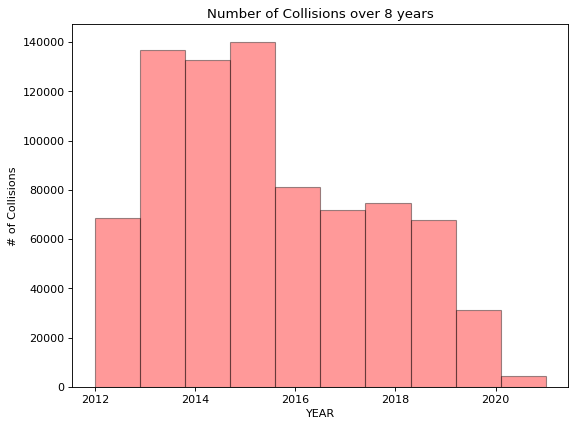

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

sns.distplot(crashes['YEAR'], hist=True, kde=False, 
             bins=10, color = 'red',
             hist_kws={'edgecolor':'black'})
plt.title("Number of Collisions over 8 years")
plt.xlabel("YEAR")
plt.ylabel("# of Collisions")

In [ ]:
borough_accidents = crashes.groupby(['BOROUGH']).size().reset_index(name='total_accidents')
borough_accidents

,BOROUGH,total_accidents
0,BRONX,106556
1,BROOKLYN,248269
2,MANHATTAN,196268
3,QUEENS,222152
4,STATEN ISLAND,35775


Text(0, 0.5, '# of collisions')

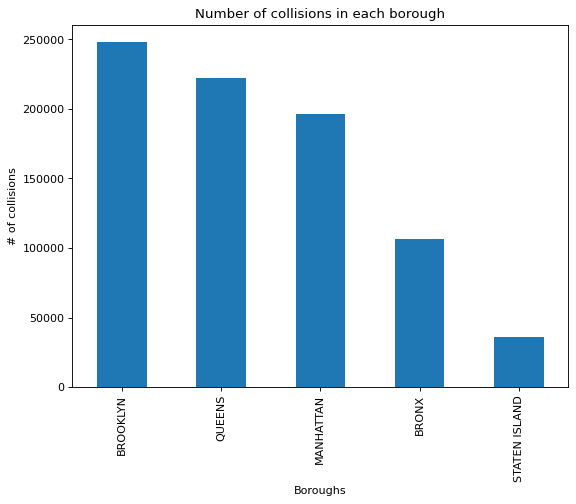

In [ ]:
figure(figsize=(8, 6), dpi=80)

crashes["BOROUGH"].value_counts().plot(kind="bar")
plt.title("Number of collisions in each borough")
plt.xlabel("Boroughs")
plt.ylabel("# of collisions")

Text(0, 0.5, '# of collisions')

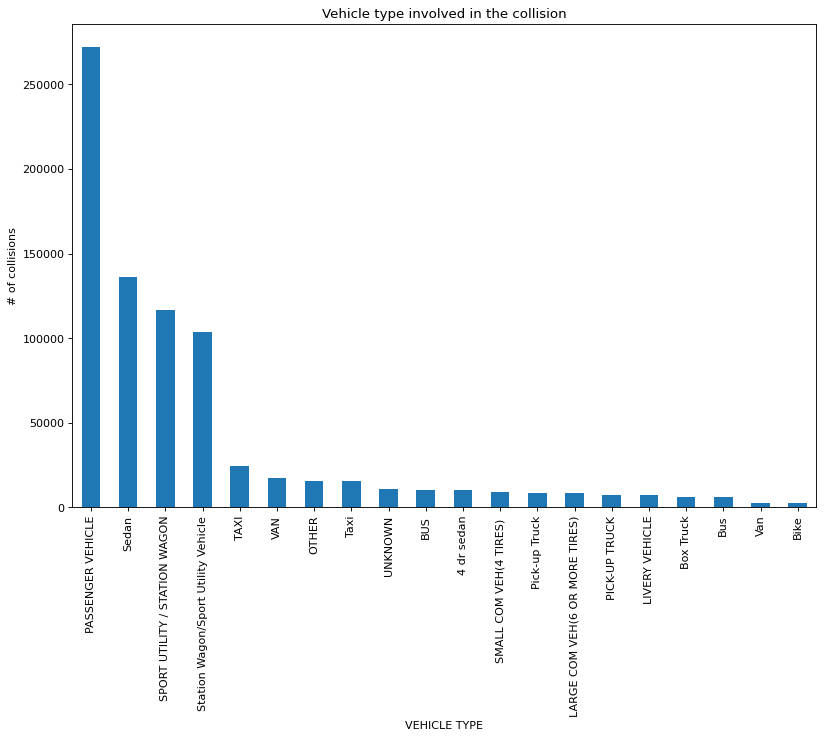

In [ ]:
figure(figsize=(12, 8), dpi=80)
crashes["VEHICLE TYPE CODE 1"].value_counts()[:20].plot(kind="bar")
plt.title("Vehicle type involved in the collision")
plt.xlabel("VEHICLE TYPE")
plt.ylabel("# of collisions")

Text(0, 0.5, '# of collisions')

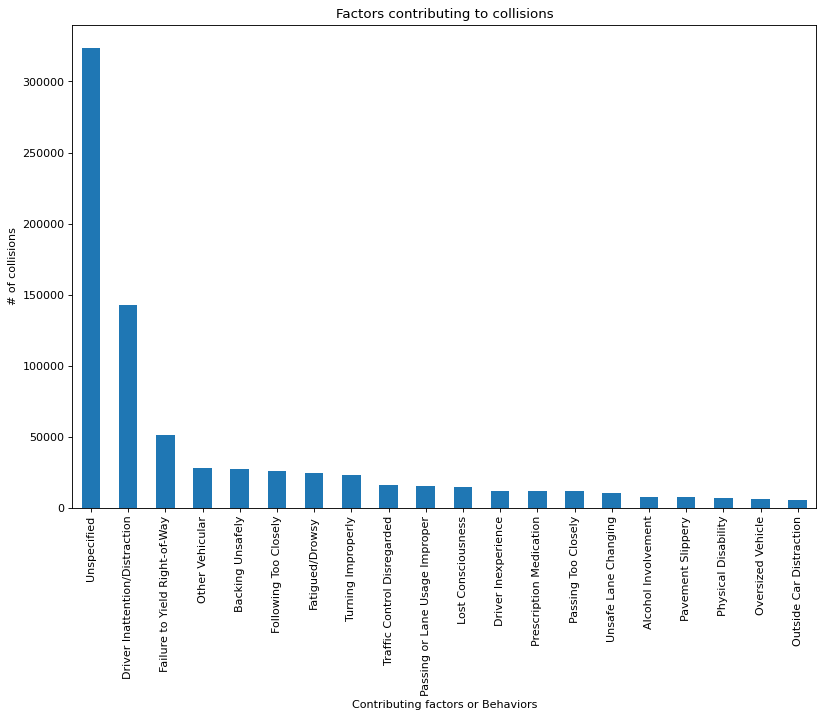

In [ ]:
figure(figsize=(12, 8), dpi=80)
crashes["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()[:20].plot(kind="bar")
plt.title("Factors contributing to collisions")
plt.xlabel("Contributing factors or Behaviors")
plt.ylabel("# of collisions")